# CATS(Computationally analyzing the state of) Mental Health

## Goals
### Primary:
* Present an overview of mental health metrics in the United States
* Prevalence and incidence
* Mortality
* Disease burden: disease-associated-life-years (DALY), years lost living (YLLs)
### Secondary:
* Investigate possible correlation between availability of mental health services and health insurance status and above metrics

## 1. Import dependencies.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## 2. Import the original dataset
* this dataset is from [GBD (global burden of disease)](www.healthdata.org/gbd/).
* broad range of available metrics for ICD diagnoses, outcomes (death, disability), epidemiology (prevalence, incidence).
* however, the datasets are not very clean.

In [30]:
file = "Resources/statistics.csv"
psych_df = pd.read_csv(file, encoding="utf-8")
psych_df.head(30)

,measure_id,measure_name,location_id,location_name,sex_id,sex_name,age_id,age_name,cause_id,cause_name,metric_id,metric_name,year,val,upper,lower
0,1,Deaths,569,Virginia,1,Male,8,15 to 19,973,Substance use disorders,1,Number,2017,17.009529,24.473869,11.200329
1,1,Deaths,569,Virginia,2,Female,8,15 to 19,973,Substance use disorders,1,Number,2017,6.289063,8.849906,4.321646
2,1,Deaths,569,Virginia,1,Male,8,15 to 19,973,Substance use disorders,2,Percent,2017,0.092553,0.127542,0.064141
3,1,Deaths,569,Virginia,2,Female,8,15 to 19,973,Substance use disorders,2,Percent,2017,0.086652,0.116264,0.062147
4,1,Deaths,569,Virginia,1,Male,8,15 to 19,973,Substance use disorders,3,Rate,2017,6.044813,8.697475,3.980351
5,1,Deaths,569,Virginia,2,Female,8,15 to 19,973,Substance use disorders,3,Rate,2017,2.344248,3.298802,1.610893
6,1,Deaths,569,Virginia,1,Male,9,20 to 24,973,Substance use disorders,1,Number,2017,69.858045,96.014836,48.429282
7,1,Deaths,569,Virginia,2,Female,9,20 to 24,973,Substance use disorders,1,Number,2017,22.966785,29.901790,16.270186
8,1,Deaths,569,Virginia,1,Male,9,20 to 24,973,Substance use disorders,2,Percent,2017,0.188586,0.249395,0.136195
9,1,Deaths,569,Virginia,2,Female,9,20 to 24,973,Substance use disorders,2,Percent,2017,0.193958,0.243023,0.146867


## 3. Clean data.
* for metrics that require normalization (eg. prevalence, mortality), rate statistics were used, so raw numbers and percentages were dropped.
* since these metrics are for all mental illness, the cause names were added to create a total count/rate, grouped under states.
* individual data tables were created for prevalence, incidence, mortality, DALY, YLL etc.

* below are some examples of cleaned data.

In [20]:
incidence = pd.read_csv("output_CSVs/cleaned_incidence_rate_sorted.csv")
incidence = incidence.drop(columns="Unnamed: 0")
incidence.head(6)

,State,Incidence (Rate),Abbreviation
0,New Jersey,488409.2,NJ
1,Illinois,512863.9,IL
2,District of Columbia,521089.4,DE
3,South Dakota,522359.5,SD
4,Connecticut,522888.9,CT
5,North Dakota,531634.0,ND


In [21]:
prevalence = pd.read_csv("output_CSVs/cleaned_prevalence_rate_sorted.csv")
prevalence = prevalence.sort_values(by="Prevalence of Mental Illness", ascending=False)
prevalence.head(6)

,State,Prevalence of Mental Illness
48,West Virginia,1902669.7
31,New Mexico,1841779.4
39,Rhode Island,1835626.5
2,Arizona,1799871.5
17,Kentucky,1787568.9
44,Utah,1774482.8


In [27]:
suicide = pd.read_csv("output_CSVs/cleaned_suicide_rates.csv")
suicide = suicide.sort_values(by="RATE", ascending=False)
suicide.head(6)

,STATE,RATE,DEATHS
25,MT,28.9,311
0,AK,27.0,200
49,WY,26.9,157
31,NM,23.3,491
12,ID,23.2,392
43,UT,22.7,663


In [29]:
DALY = pd.read_csv("output_CSVs/cleaned_DALY_2.csv")
DALY = DALY.drop(columns="Unnamed: 0")
DALY = DALY.sort_values(by="DALY", ascending=False)
DALY.head(6)

,State,Abbreviation,DALY
4,California,CA,3741299.1
43,Texas,TX,2544857.0
9,Florida,FL,2271085.0
32,New York,NY,1936880.0
38,Pennsylvania,PA,1620977.1
35,Ohio,OH,1536390.3


In [14]:
YLL = pd.read_csv("output_CSVs/cleaned_YLL_sorted.csv")
YLL = YLL.drop(columns="Unnamed: 0")
YLL = YLL.sort_values(by="YLL", ascending=False)
YLL.head(6)

,State,Abbreviation,YLL
4,California,CA,878335.4
9,Florida,FL,692897.1
43,Texas,TX,607737.6
35,Ohio,OH,558669.1
38,Pennsylvania,PA,546866.2
32,New York,NY,444441.9


## Heatmaps
1. [Incidence](https://plot.ly/~bkcenik/10)
2. [Prevalence](https://plot.ly/~bkcenik/8)
3. [Suicide Rates](https://plot.ly/~bkcenik/20)
4. [DALYs](https://plot.ly/~bkcenik/14)
5. [YLLs](https://plot.ly/~bkcenik/12)

#### 1. Incidence
![Incidence](https://plot.ly/~bkcenik/18.jpeg)
#### 2. Prevalence
![Prevalence](https://plot.ly/~bkcenik/8.jpeg)
#### 3. Suicide Rates
![Suicide Rates](https://plot.ly/~bkcenik/20.jpeg)
#### 4. Disability-associated Life-Years (DALYs)
![DALYs](https://plot.ly/~bkcenik/14.jpeg)
#### 5. Years of Life Lost (YLLs)
![YLLs](https://plot.ly/~bkcenik/12.jpeg)

## Correlation Analysis
* `seaborn` was used for analysis.
* the primary goal was to see whether access to healthcare and health insurance positively influenced any of the other metrics.

In [1]:
import seaborn as sns

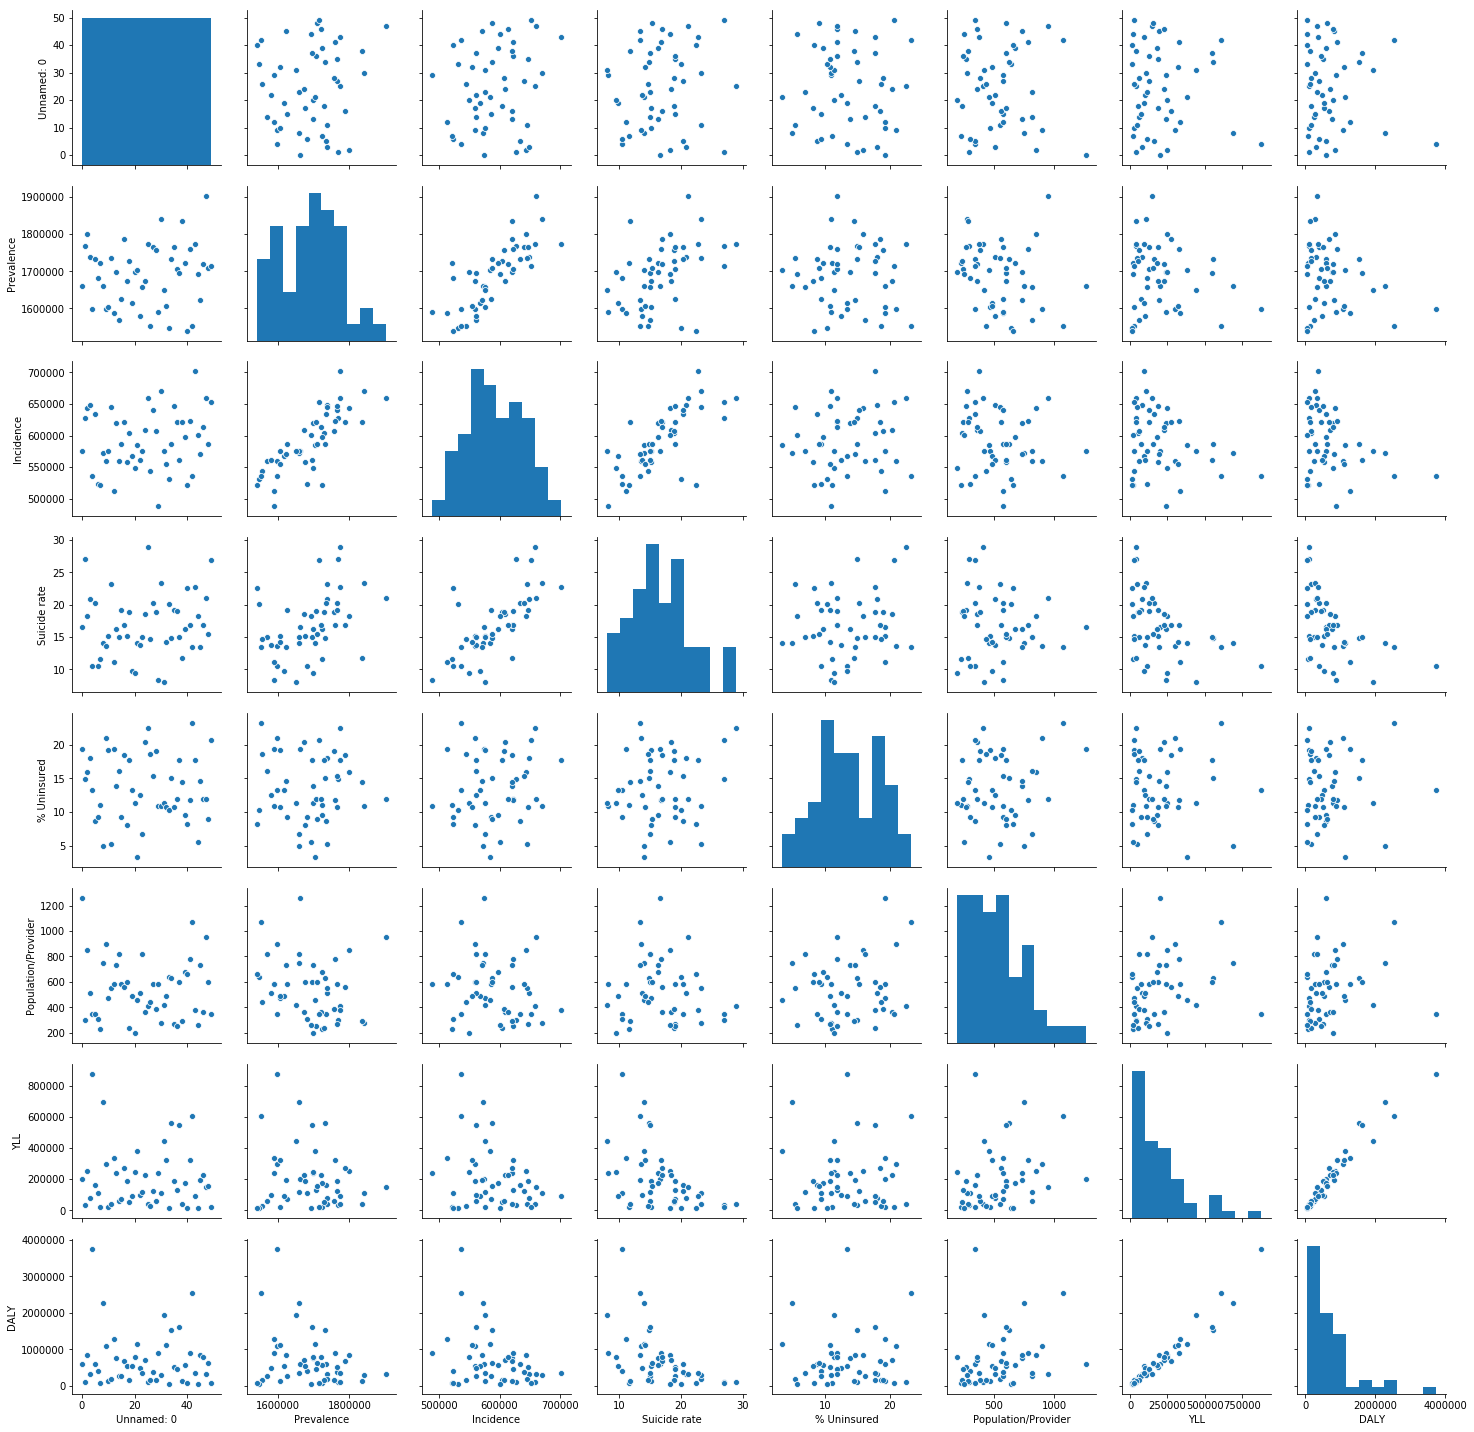

In [4]:
combined5 = pd.read_csv("output_CSVs/all_combined_statistics_FINAL.csv")
pairplot = sns.pairplot(combined5)
pairplot

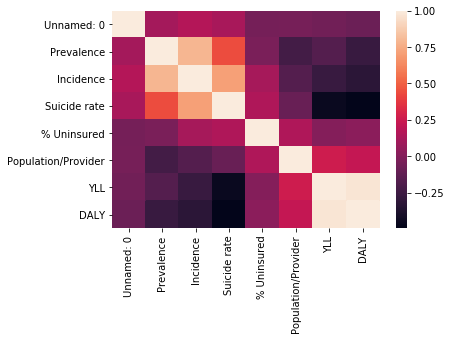

In [8]:
correlation = combined5.corr()
correlation
heatmap = sns.heatmap(correlation)
heatmap

In [16]:
correlation = incidence = pd.read_csv("output_CSVs/correlation_statistics.csv")
index = ["Prevalence","Incidence","Suicide rate", "% Uninsured", "Population/Provider", "YLL", "DALY"]
correlation['Parameter']=index
correlation = correlation[["Parameter","Prevalence", "Incidence", "Suicide rate", "% Uninsured", "Population/Provider", "YLL", "DALY"]]
correlation = correlation.set_index('Parameter')
correlation

,Prevalence,Incidence,Suicide rate,% Uninsured,Population/Provider,YLL,DALY
Parameter,,,,,,,
Prevalence,1.000000,0.793494,0.439703,-0.028092,-0.230117,-0.167649,-0.271065
Incidence,0.793494,1.000000,0.711116,0.119858,-0.163948,-0.268184,-0.323826
Suicide rate,0.439703,0.711116,1.000000,0.148941,-0.096211,-0.454603,-0.494643
% Uninsured,-0.028092,0.119858,0.148941,1.000000,0.148606,0.001785,0.027307
Population/Provider,-0.230117,-0.163948,-0.096211,0.148606,1.000000,0.261714,0.224568
YLL,-0.167649,-0.268184,-0.454603,0.001785,0.261714,1.000000,0.971731
DALY,-0.271065,-0.323826,-0.494643,0.027307,0.224568,0.971731,1.000000


### Pairwise comparisons

![pairplot](https://github.com/bkcenik/Cats/blob/mochi/Bercin%20analyses/output%20images/pairplot.png)


![heatmap](https://github.com/bkcenik/Cats/blob/mochi/Bercin%20analyses/output%20images/heatmap.png)

## Conclusions

1. No correlation observed between access to health care and health insurance; and prevalence, incidence, disability or mortality due to mental ilness.
2. Some correlation (0.7) observed between suicide rate and incidence.